# Credit Card Defaults

## Data Preprocessing


In [59]:
import matplotlib.pyplot as plt
import pandas as pd

import utils

In [60]:
# Load the data
data = pd.read_csv('UCI_Credit_Card.csv')
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [61]:
# Split the data into features and target
X = data.drop('default.payment.next.month', axis=1)
y = data['default.payment.next.month']

In [62]:
# Check for missing values
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [63]:
# Check for duplicates
data.duplicated().sum()

0

## Feature Engineering

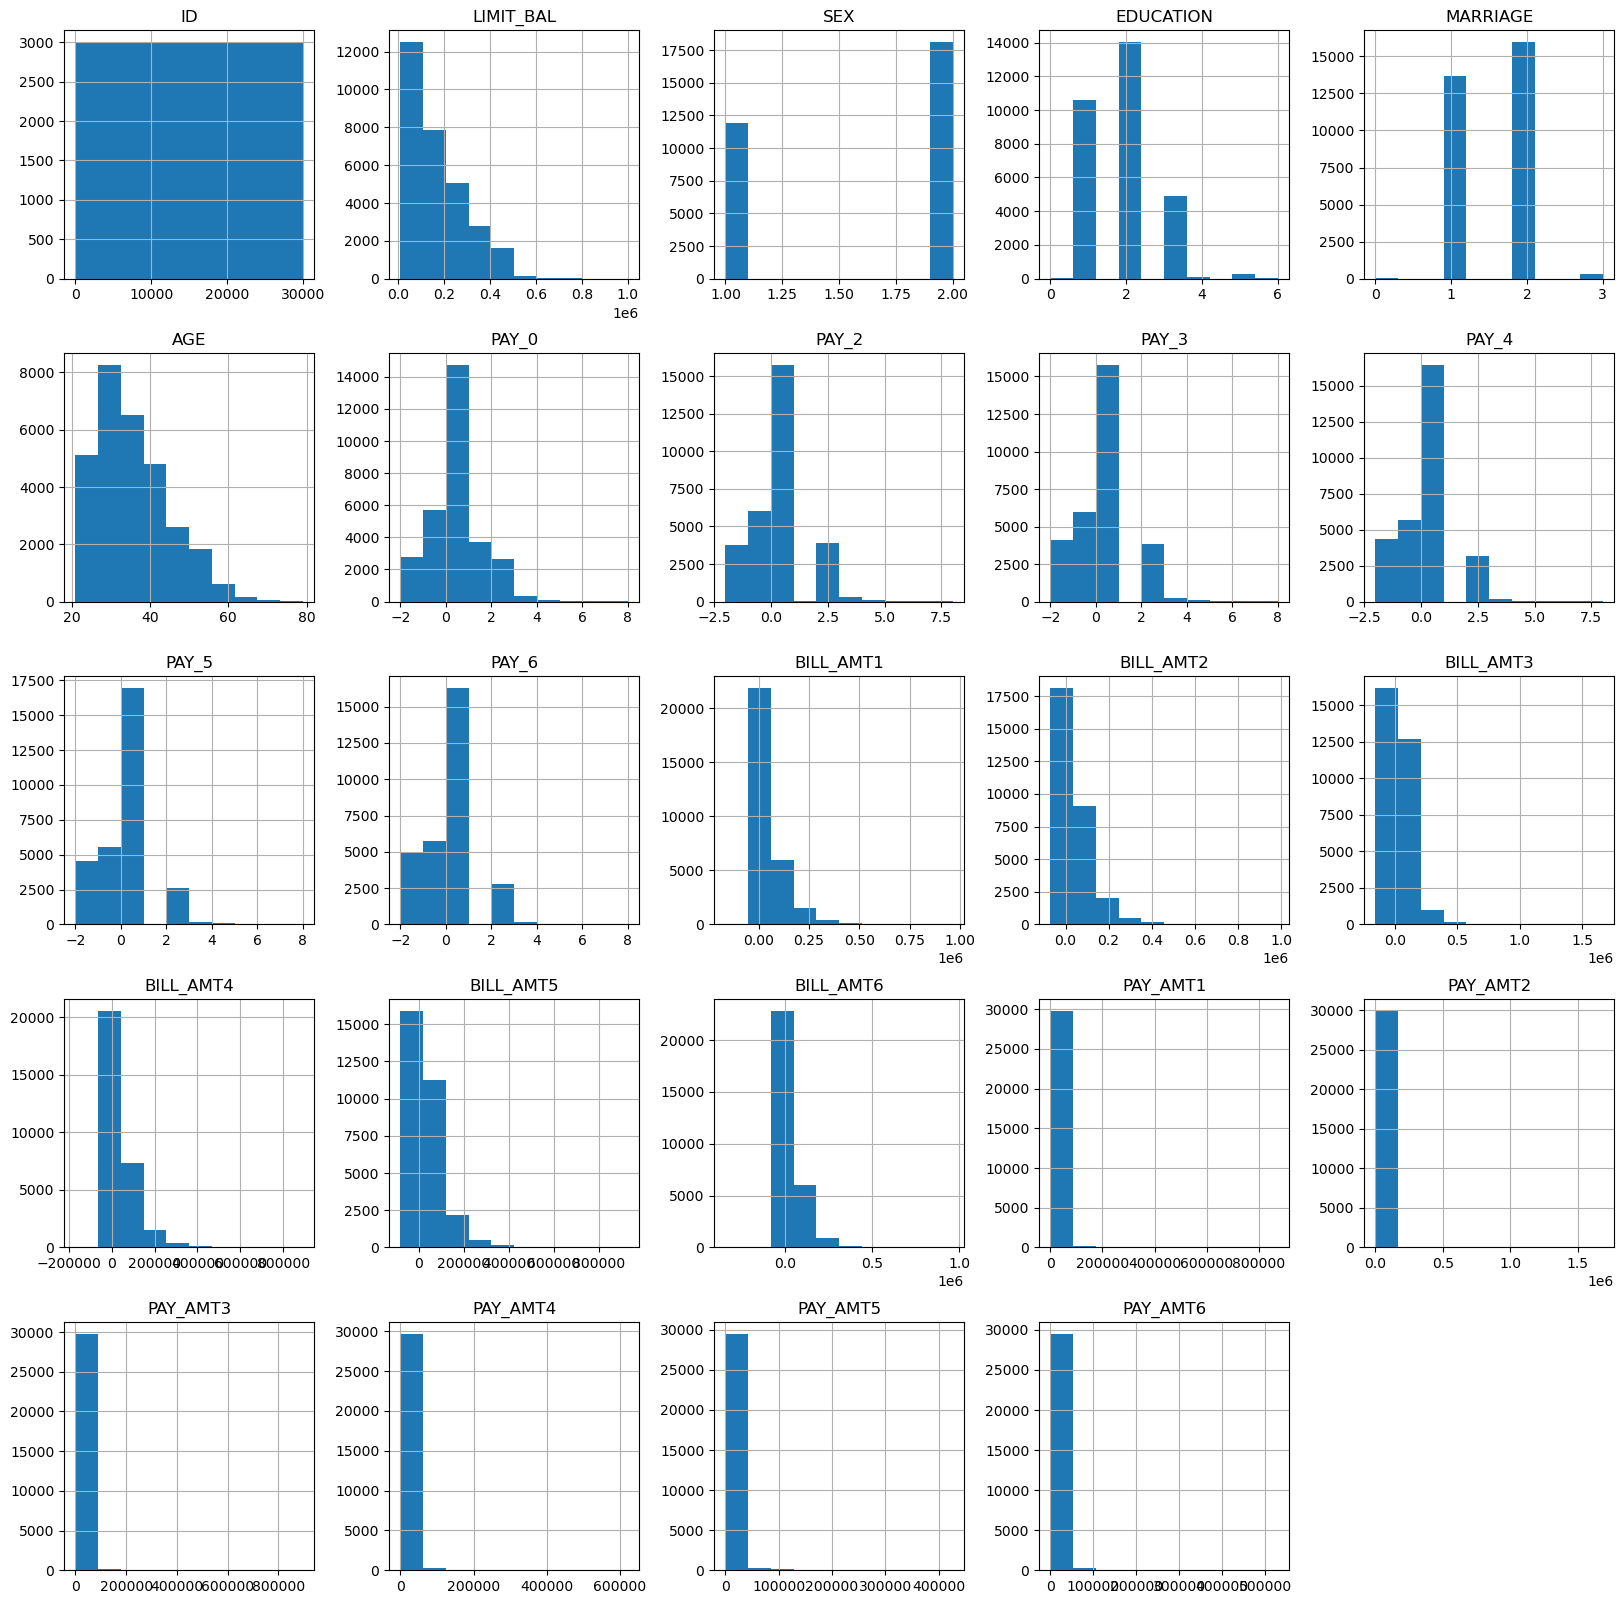

In [64]:
# Plot the distribution of the features
X.hist(figsize=(20, 20))
plt.show()

In [39]:
# remove columns with high multicollinearity
X_vif = utils.calculate_vif(X)
X_vif

Removing BILL_AMT2 with VIF 38.22672161233544
Removing BILL_AMT5 with VIF 36.07013404322631
Removing BILL_AMT3 with VIF 24.117869197117088
Removing BILL_AMT4 with VIF 15.233464074302127
Removing AGE with VIF 11.213615565468661


,variables,VIF
2,SEX,8.397601
4,MARRIAGE,6.333442
3,EDUCATION,5.247863
12,BILL_AMT6,5.123965
9,PAY_5,4.966830
11,BILL_AMT1,4.646707
8,PAY_4,4.433718
0,ID,3.751614
7,PAY_3,3.705805
1,LIMIT_BAL,3.660478


In [40]:
# remove the columns with high multicollinearity
X_vif = X.drop(columns=['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5'])

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_vif, y, test_size=0.3, random_state=42, shuffle=True)

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled array back to DataFrame with original column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

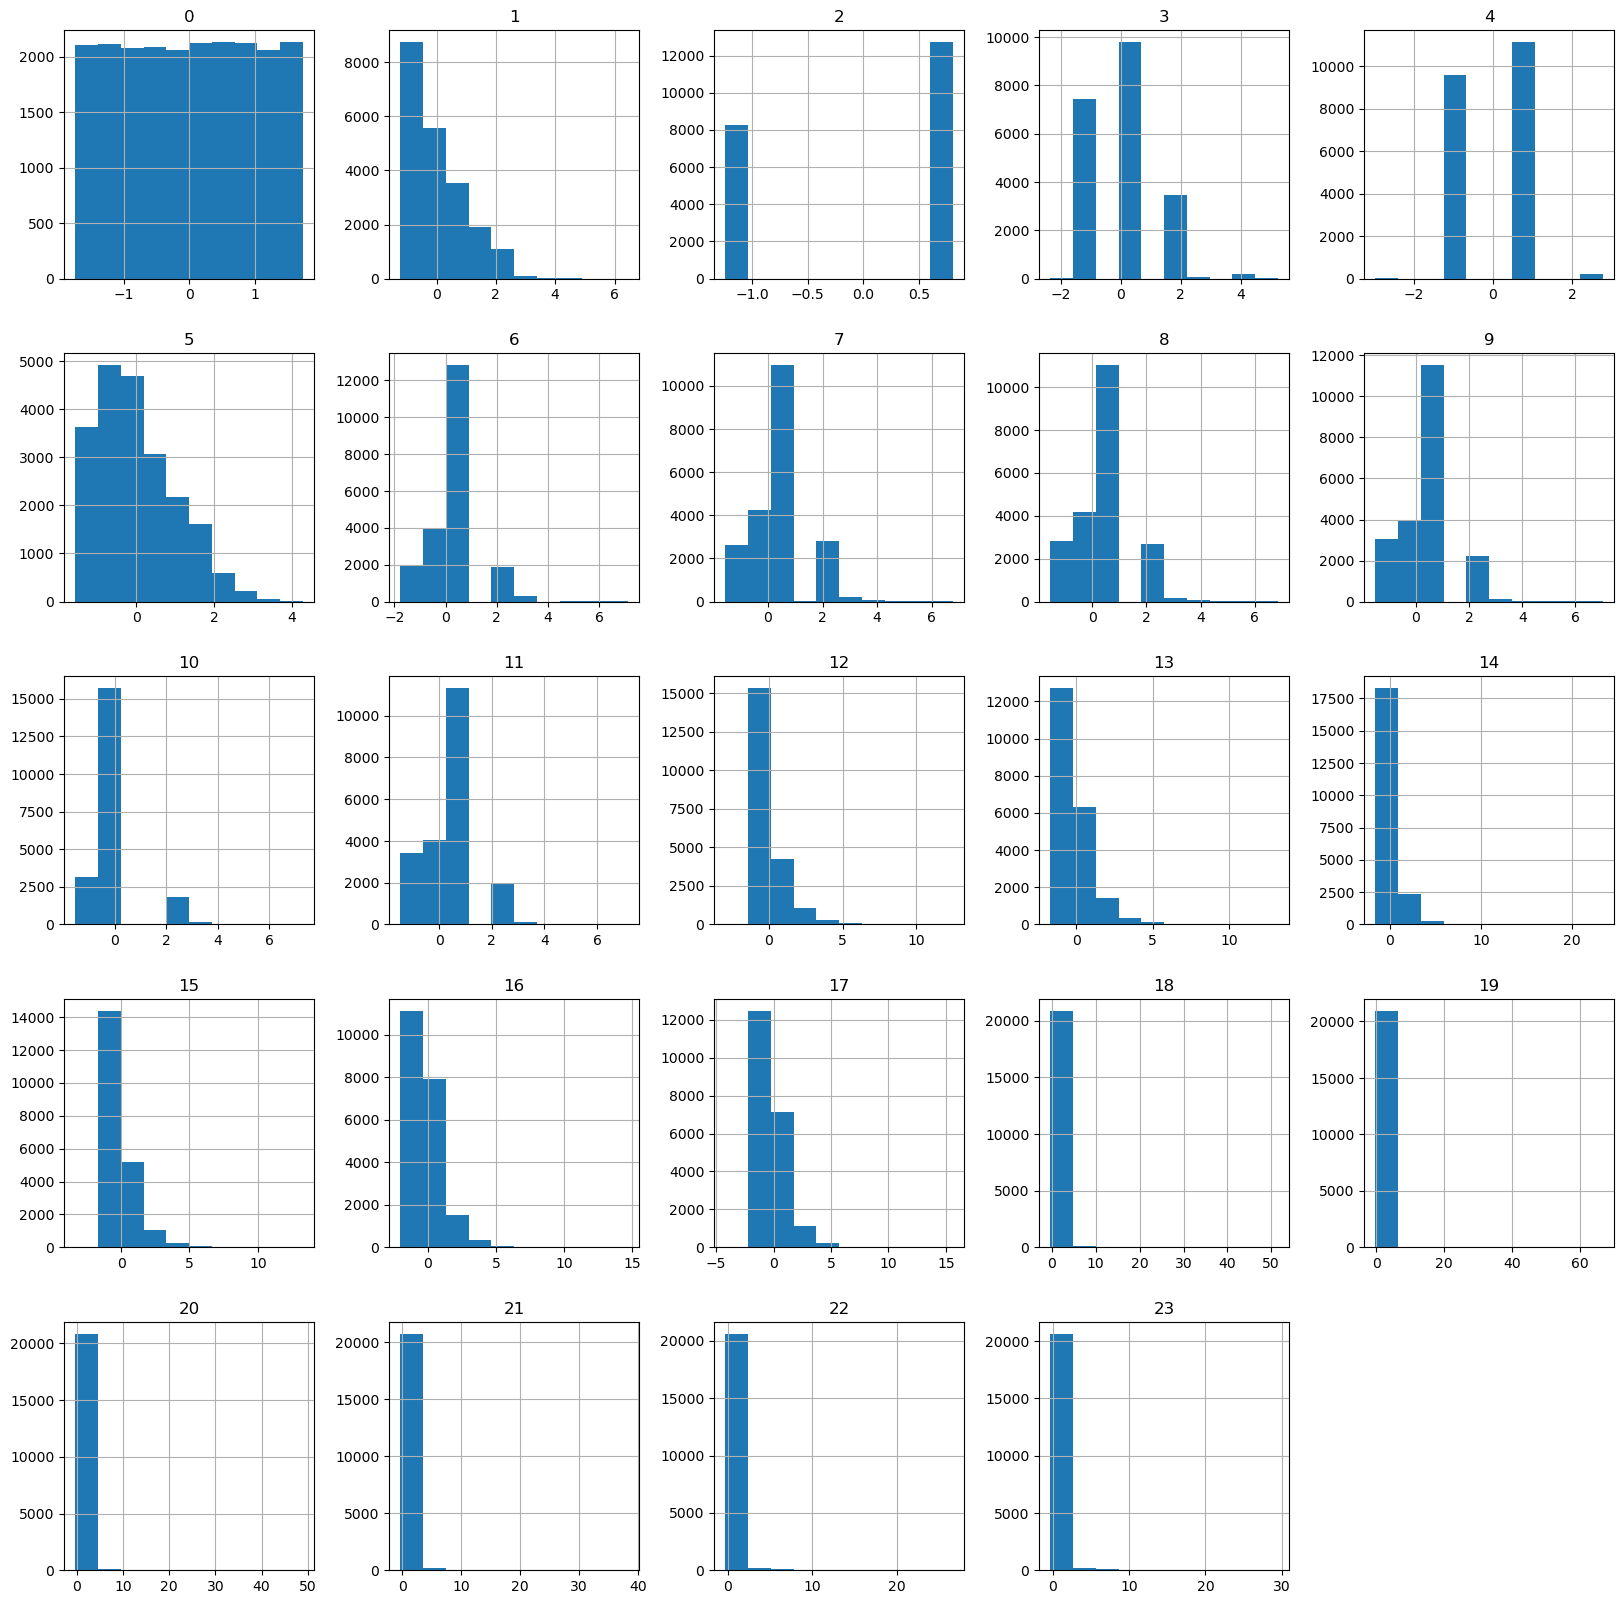

In [67]:
# Plot the distribution of the scaled features
pd.DataFrame(X_train_scaled).hist(figsize=(20, 20))
plt.show()

## Model Selection

In [68]:
# use logit regression as the model
import statsmodels.api as sm
# Reset the index of y_train to match X_train_scaled_const
y_train = y_train.reset_index(drop=True)

# Add a constant for the intercept
X_train_scaled_const = sm.add_constant(X_train_scaled_df)

model = sm.Logit(y_train, X_train_scaled_const).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.465010
         Iterations 7
                               Logit Regression Results                               
Dep. Variable:     default.payment.next.month   No. Observations:                21000
Model:                                  Logit   Df Residuals:                    20975
Method:                                   MLE   Df Model:                           24
Date:                        Sat, 28 Sep 2024   Pseudo R-squ.:                  0.1231
Time:                                14:39:24   Log-Likelihood:                -9765.2
converged:                               True   LL-Null:                       -11136.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4572      0.020    -73.732 

In [77]:
# remove columns with high p-values greater than 0.05
X_train_scaled_df = X_train_scaled_df.drop(columns=['ID', 'BILL_AMT2', 'BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])
X_test_scaled_df = X_test_scaled_df.drop(columns=['ID', 'BILL_AMT2', 'BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6', 'PAY_4', 'PAY_5', 'PAY_6', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])

In [79]:
# Fit the model with the new features
X_train_scaled_const = sm.add_constant(X_train_scaled_df)
model = sm.Logit(y_train, X_train_scaled_const).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.465806
         Iterations 7
                               Logit Regression Results                               
Dep. Variable:     default.payment.next.month   No. Observations:                21000
Model:                                  Logit   Df Residuals:                    20988
Method:                                   MLE   Df Model:                           11
Date:                        Sat, 28 Sep 2024   Pseudo R-squ.:                  0.1216
Time:                                14:44:39   Log-Likelihood:                -9781.9
converged:                               True   LL-Null:                       -11136.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4491      0.020    -74.046 

## Model Evaluation

In [86]:
# evaluate the model
X_test_scaled_const = sm.add_constant(X_test_scaled_df)
y_pred_prob = model.predict(X_test_scaled_const)  # Predicted probabilities for test data
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

In [87]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8137777777777778


In [88]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix) 

Confusion Matrix:
 [[6594  446]
 [1230  730]]


In [90]:
# use classification report
from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7040
           1       0.62      0.37      0.47      1960

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.68      9000
weighted avg       0.79      0.81      0.80      9000



This model is doing a good job predicting when people are not going to default on their credit cards, but it is doing a poor job of predicting when people are going to default on their credit cards. The model has a high precision and recall for the negative class, but a low precision and recall for the positive class.

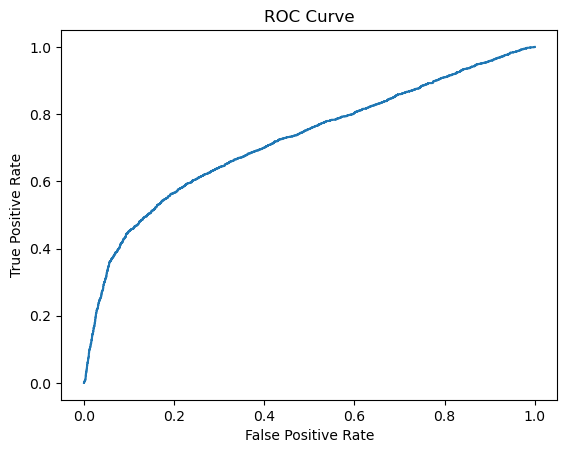

In [84]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


In [85]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred_prob)
print("AUC:", auc)


AUC: 0.7215722475069574
